<a href="https://colab.research.google.com/github/m1nc/CS4375-linear-regression-gradient-descent/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Dataset links
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=";")

In [ ]:
df.head()

# Preprocessing


# Drop nulls or any NA values
df = df.dropna()

# Drop any redundant rows
df = df.drop_duplicates()

# Convert categorical variables to numerical variables
# All of the values in our Wine dataset contains only numerical attributes so conversion from categorical to numerical was not required.

# If you feel an attribute is not suitable or is not correlated with the outcome, you might want to get rid of it.
# Our dataset doesn't have any obvious junk columns.

# Standardizing the features using StandardScaler of sklearn
# Splitting the features and target

# Features
X = df.iloc[:, :-1].values

# Target
Y = df.iloc[:, -1].values

# Standardizing features

scaler = StandardScaler()

X = scaler.fit_transform(X)


In [ ]:
# Splitting the dataset into training and testing parts
# Train/Test ratio is 80/20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
# Initializing parameters

n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0
learning_rate = 0.01

# Prediction function

def predict(X, weights, bias):
  return np.dot(X, weights) + bias

# MSE

def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

# Gradient descent

def gradient_descent(X, Y, weights, bias, learning_rate, iterations):
  n = len(Y)
  log = []

  for i in range(iterations):
    y_pred = predict(X, weights, bias)

    error = y_pred - Y
    dw = (1/n) * np.dot(X.T, error)
    db = (1/n) * np.sum(error)

    weights = weights - (learning_rate * dw)
    bias = bias - (learning_rate * db)

    mse = mean_squared_error(Y, predict(X, weights, bias))
    log.append((i, learning_rate, mse))

  return weights, bias, log


In [ ]:
# Parameter turning

learning_rates = [0.001, 0.002, 0.005]
iterations = 1000

best_mse = float("inf")
best_params =  None
all_logs = []

for lr in learning_rates:
  w,b, log = gradient_descent(
      X_train,
      Y_train,
      weights.copy(),
      bias,
      lr,
      iterations
  )

  all_logs.extend(log)

  final_mse = log[-1][2]

  if final_mse < best_mse:
    best_mse = final_mse
    best_params = (lr, w, b)

In [ ]:
# Saving log file

with open("training_log.txt", "w") as f:
  f.write("iteration, learning_rate, iterations, mse\n")

  for entry in all_logs:
    f.write(f"{entry[0]}, {entry[1]}, {entry[2]}\n")

In [ ]:
# applying the model

best_learning_rate, best_weights, best_bias = best_params

y_test_pred = predict(X_test, best_weights, best_bias)

test_mse = mean_squared_error(Y_test, y_test_pred)

print("Best Learning rate: ", best_learning_rate)
print("Test MSE: ", test_mse)

Best Learning rate:  0.005
Test MSE:  0.4438230698015328


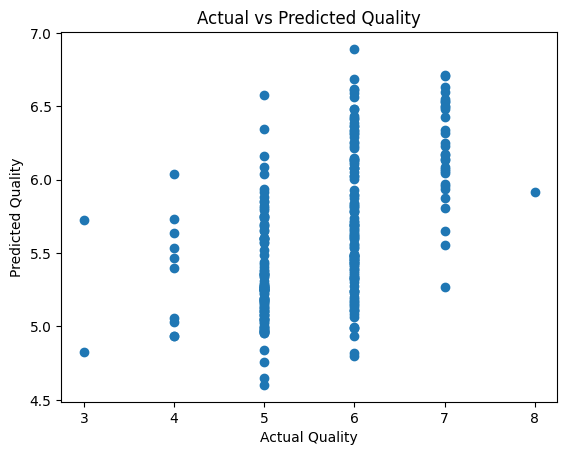

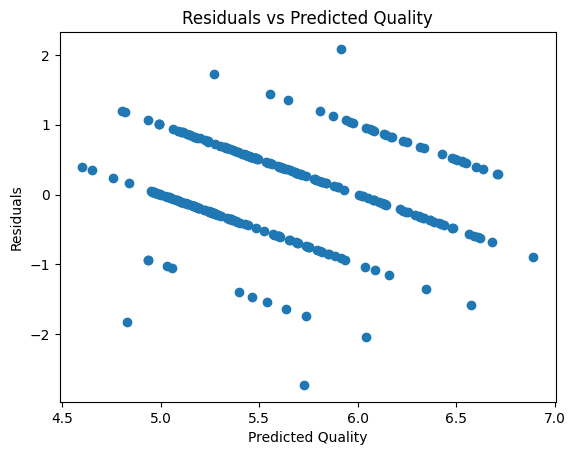

In [ ]:
# adding some plots

# Actual vs Predicted Quality plot
plt.figure()
plt.scatter(Y_test, y_test_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")
plt.savefig("actual_vs_predicted_test.png", dpi=300, bbox_inches="tight")
plt.show()

# residuals plot

residuals = Y_test - y_test_pred
plt.figure()
plt.scatter(y_test_pred, residuals)
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Quality")
plt.savefig("Residuals_vs_Predicted_Quality.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Assume final_model is trained and X is your feature DataFrame
coefficients = pd.Series(final_model.coef_, index=X.columns)

# Sort and plot horizontally
coefficients.sort_values().plot(kind='barh')

plt.title("Feature Coefficients")

# Save the plot to file
plt.savefig("feature_coefficients.png")

# Then show it
plt.show()

NameError: name 'final_model' is not defined